In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('train.csv')


In [2]:
df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [5]:
df.store.value_counts()

0    32870
1    32870
2    32870
3    32870
4    32870
5    32870
6    32870
Name: store, dtype: int64

         Date  store  product  number_sold
0  2010-01-01      0        0          801
1  2010-01-02      0        0          810
2  2010-01-03      0        0          818
3  2010-01-04      0        0          796
4  2010-01-05      0        0          808
Date           0
store          0
product        0
number_sold    0
dtype: int64
               store        product    number_sold
count  230090.000000  230090.000000  230090.000000
mean        3.000000       4.500000     780.926107
std         2.000004       2.872288     204.096737
min         0.000000       0.000000     238.000000
25%         1.000000       2.000000     722.000000
50%         3.000000       4.500000     835.000000
75%         5.000000       7.000000     914.000000
max         6.000000       9.000000    1205.000000


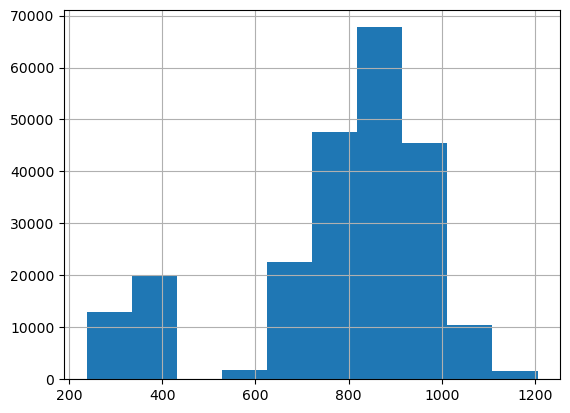

In [3]:
#This is the description of the dataset before ttransforming our Date column into index.


# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Visualize the data using scatter plots, histograms, etc.
# For example, you can plot the distribution of the 'sold_numbers' column using a histogram:
df['number_sold'].hist()

# Compute summary statistics
print(df.describe())


In [56]:
# Convert the date column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create dummy variables for store_id and product_id columns
df = pd.get_dummies(df, columns=['store', 'product'])

In [57]:
df.head()

,number_sold,store_0,store_1,store_2,store_3,store_4,store_5,store_6,product_0,product_1,product_2,product_3,product_4,product_5,product_6,product_7,product_8,product_9
Date,,,,,,,,,,,,,,,,,,
2010-01-01,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2010-01-02,810,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2010-01-03,818,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2010-01-04,796,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2010-01-05,808,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


            number_sold  store_0  store_1  store_2  store_3  store_4  store_5  \
Date                                                                            
2010-01-01          801        1        0        0        0        0        0   
2010-01-02          810        1        0        0        0        0        0   
2010-01-03          818        1        0        0        0        0        0   
2010-01-04          796        1        0        0        0        0        0   
2010-01-05          808        1        0        0        0        0        0   

            store_6  product_0  product_1  product_2  product_3  product_4  \
Date                                                                         
2010-01-01        0          1          0          0          0          0   
2010-01-02        0          1          0          0          0          0   
2010-01-03        0          1          0          0          0          0   
2010-01-04        0          1          0 

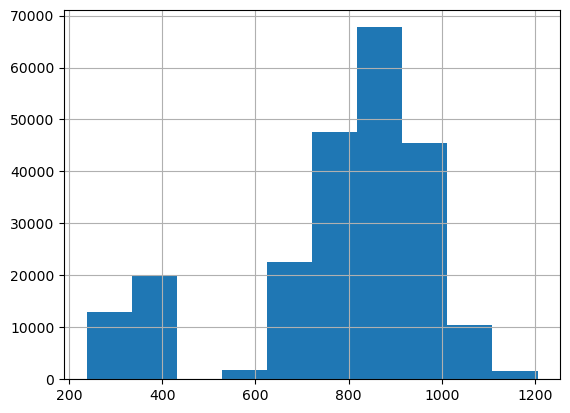

In [44]:
#This is the description of the dataset after ttransforming our Date column into index.

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Visualize the data using scatter plots, histograms, etc.
# For example, you can plot the distribution of the 'sold_numbers' column using a histogram:
df['number_sold'].hist()

# Compute summary statistics
print(df.describe())


In [40]:
# Handle missing values
# For example, you can fill in missing values with the median value of the column:
df.fillna(df.median(), inplace=True)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop(['number_sold'], axis=1)
y = df['number_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
#Checking len of X_train
len(X_train)

184072

In [42]:
#Checking len of y_train
len(X_test)

46018

In [43]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error (MSE): {:.2f}".format(mse))
print("R-squared score: {:.2f}".format(r2))


Mean squared error (MSE): 3411.94
R-squared score: 0.92


In [62]:
model.predict([[1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]])

C:\Users\Zawwar\anaconda3_new\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([793.9140625])

In [47]:
#CAlculating MSE with baseline model

import pandas as pd
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('train.csv')

# Split the data into training and testing sets
train_df = df[df['Date'] < '2011-01-01']
test_df = df[df['Date'] >= '2011-01-01']

# Calculate the mean of the sold_numbers column in the training set
mean_sold_numbers = train_df['number_sold'].mean()

# Create a list of predictions that is the same length as the testing set
baseline_predictions = [mean_sold_numbers] * len(test_df)

# Calculate the MSE of the baseline model on the testing set
mse_baseline = mean_squared_error(test_df['number_sold'], baseline_predictions)

print('MSE of baseline model:', mse_baseline)


MSE of baseline model: 41866.370315773966


In [48]:
#Comparison between MSE of baseline model and linear model.

print("Mean squared error (MSE): {:.2f}".format(mse))
print('MSE of baseline model:', mse_baseline)

Mean squared error (MSE): 3411.94
MSE of baseline model: 41866.370315773966
